In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as skm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
precleaned_data = pd.read_csv('loan_data_set.csv')
a=['LP002991','Male','No',0,'Graduate','No',5849,0.0,120,360.0,1.0,'Urban','Y']
precleaned_data.loc[len(precleaned_data.index)] = a 

In [3]:
 precleaned_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
precleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            615 non-null    object 
 1   Gender             602 non-null    object 
 2   Married            612 non-null    object 
 3   Dependents         600 non-null    object 
 4   Education          615 non-null    object 
 5   Self_Employed      583 non-null    object 
 6   ApplicantIncome    615 non-null    int64  
 7   CoapplicantIncome  615 non-null    float64
 8   LoanAmount         593 non-null    float64
 9   Loan_Amount_Term   601 non-null    float64
 10  Credit_History     565 non-null    float64
 11  Property_Area      615 non-null    object 
 12  Loan_Status        615 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.3+ KB


In [5]:
precleaned_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,615.000000,615.000000,593.000000,601.000000,565.000000
mean,5404.183740,1618.609626,146.367622,342.029950,0.842478
std,6104.091296,2924.595230,85.521886,65.070263,0.364615
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2879.000000,0.000000,100.000000,360.000000,1.000000
50%,3813.000000,1167.000000,128.000000,360.000000,1.000000
75%,5807.500000,2292.500000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [6]:
precleaned_data.shape

(615, 13)

<AxesSubplot:>

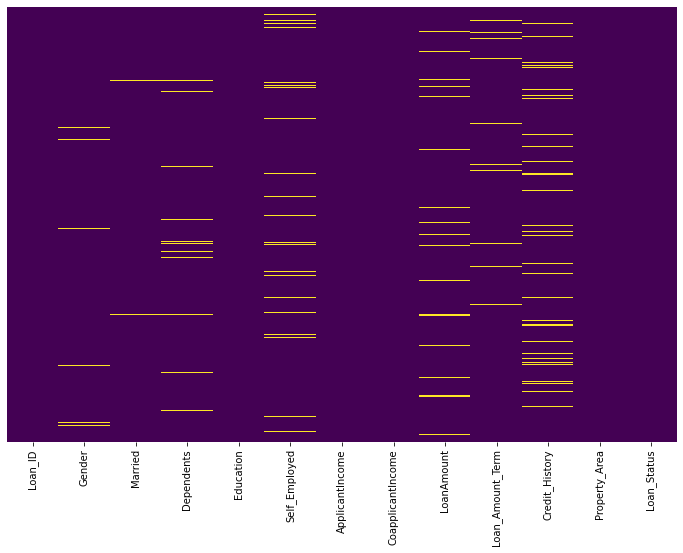

In [7]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(precleaned_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
precleaned_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
precleaned_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
non_numeric = precleaned_data[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]
non_numeric


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,Semiurban,N


In [11]:
numeric_data = precleaned_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
numeric_data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0
613,4583,0.0,133.0,360.0,0.0


In [12]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        615 non-null    object
 1   Gender         602 non-null    object
 2   Married        612 non-null    object
 3   Dependents     600 non-null    object
 4   Education      615 non-null    object
 5   Self_Employed  583 non-null    object
 6   Property_Area  615 non-null    object
 7   Loan_Status    615 non-null    object
dtypes: object(8)
memory usage: 43.2+ KB


In [13]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    615 non-null    int64  
 1   CoapplicantIncome  615 non-null    float64
 2   LoanAmount         593 non-null    float64
 3   Loan_Amount_Term   601 non-null    float64
 4   Credit_History     565 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 28.8 KB


In [14]:
temp1 = non_numeric.groupby('Gender')['Loan_ID'].count().idxmax()
temp2 = non_numeric.groupby('Married')['Loan_ID'].count().idxmax()
temp3 = non_numeric.groupby('Dependents')['Loan_ID'].count().idxmax()
temp4 = non_numeric.groupby('Self_Employed')['Loan_ID'].count().idxmax()

In [15]:
non_numeric['Gender'] = non_numeric['Gender'].fillna(temp1)
non_numeric['Married'] = non_numeric['Married'].fillna(temp2)
non_numeric['Dependents'] = non_numeric['Dependents'].fillna(temp3)
non_numeric['Self_Employed'] = non_numeric['Self_Employed'].fillna(temp4)

<ipython-input-15-ad1a9b49a7b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric['Gender'] = non_numeric['Gender'].fillna(temp1)
<ipython-input-15-ad1a9b49a7b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric['Married'] = non_numeric['Married'].fillna(temp2)
<ipython-input-15-ad1a9b49a7b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [16]:
non_numeric.isnull().sum()


Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

<AxesSubplot:>

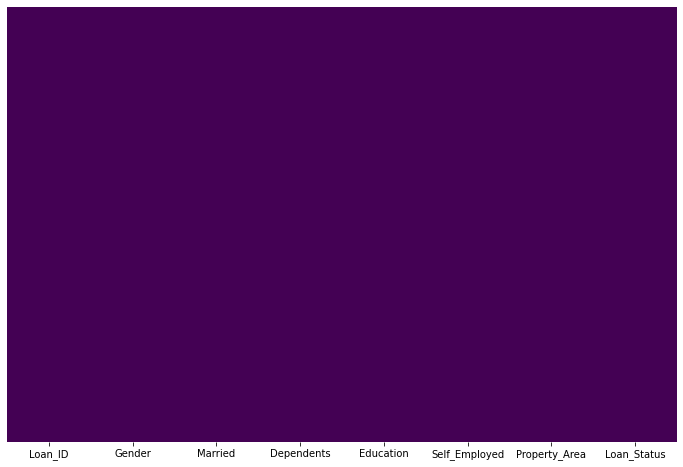

In [17]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(non_numeric.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [18]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0
613,4583,0.0,133.0,360.0,0.0


In [19]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    615 non-null    int64  
 1   CoapplicantIncome  615 non-null    float64
 2   LoanAmount         593 non-null    float64
 3   Loan_Amount_Term   601 non-null    float64
 4   Credit_History     565 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 28.8 KB


In [20]:
numeric_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [21]:
mean1 = numeric_data['LoanAmount'].mean()
mean2 = numeric_data['Loan_Amount_Term'].mean()
mean3 = numeric_data['Credit_History'].mean()

In [22]:
numeric_data['LoanAmount'] = numeric_data['LoanAmount'].fillna(mean1)
numeric_data['Loan_Amount_Term'] = numeric_data['Loan_Amount_Term'].fillna(mean2)
numeric_data['Credit_History'] = numeric_data['Credit_History'].fillna(mean3)


<ipython-input-22-089fd95dcbff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['LoanAmount'] = numeric_data['LoanAmount'].fillna(mean1)
<ipython-input-22-089fd95dcbff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Loan_Amount_Term'] = numeric_data['Loan_Amount_Term'].fillna(mean2)
<ipython-input-22-089fd95dcbff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [23]:
numeric_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

<AxesSubplot:>

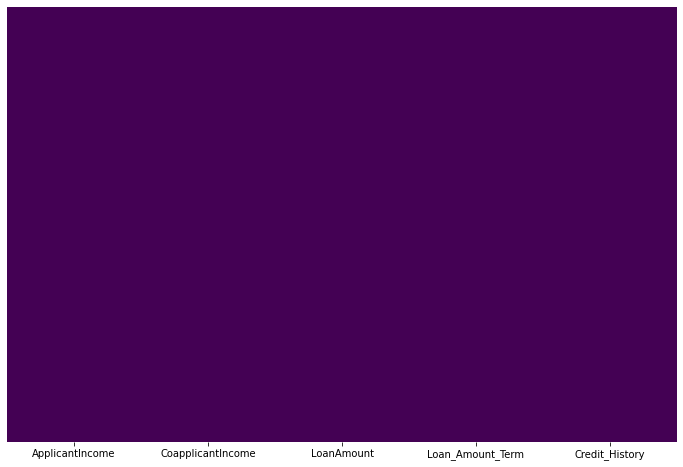

In [24]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(numeric_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [25]:
encode_non_numeric = pd.get_dummies(non_numeric, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'], drop_first = True)
encode_non_numeric


,Loan_ID,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,1,0,1,0,0,0,0,0,0,1,1
1,LP001003,1,1,0,1,0,0,0,0,0,0,0
2,LP001005,1,1,1,0,0,0,0,1,0,1,1
3,LP001006,1,1,1,0,0,0,1,0,0,1,1
4,LP001008,1,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002979,1,1,0,0,0,1,0,0,0,0,1
611,LP002983,1,1,0,1,0,0,0,0,0,1,1
612,LP002984,1,1,0,0,1,0,0,0,0,1,1
613,LP002990,0,0,1,0,0,0,0,1,1,0,0


In [26]:
encode_non_numeric.drop('Loan_ID', axis = 1, inplace = True)


In [27]:
encode_non_numeric

,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,1,0,0,0,0,0,0,1,1
1,1,1,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,1,0,1,1
3,1,1,1,0,0,0,1,0,0,1,1
4,1,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
610,1,1,0,0,0,1,0,0,0,0,1
611,1,1,0,1,0,0,0,0,0,1,1
612,1,1,0,0,1,0,0,0,0,1,1
613,0,0,1,0,0,0,0,1,1,0,0


In [28]:
encode_non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Male              615 non-null    uint8
 1   Married_Yes              615 non-null    uint8
 2   Dependents_0             615 non-null    uint8
 3   Dependents_1             615 non-null    uint8
 4   Dependents_2             615 non-null    uint8
 5   Dependents_3+            615 non-null    uint8
 6   Education_Not Graduate   615 non-null    uint8
 7   Self_Employed_Yes        615 non-null    uint8
 8   Property_Area_Semiurban  615 non-null    uint8
 9   Property_Area_Urban      615 non-null    uint8
 10  Loan_Status_Y            615 non-null    uint8
dtypes: uint8(11)
memory usage: 11.4 KB


In [29]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.367622,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0
613,4583,0.0,133.000000,360.0,0.0


In [30]:
new_loan_data = pd.concat([encode_non_numeric, numeric_data], axis = 1)
new_loan_data

,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,1,0,0,0,0,0,0,1,1,5849,0.0,146.367622,360.0,1.0
1,1,1,0,1,0,0,0,0,0,0,0,4583,1508.0,128.000000,360.0,1.0
2,1,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0
3,1,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.000000,360.0,1.0
4,1,0,1,0,0,0,0,0,0,1,1,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,1,0,0,0,1,0,0,0,0,1,4106,0.0,40.000000,180.0,1.0
611,1,1,0,1,0,0,0,0,0,1,1,8072,240.0,253.000000,360.0,1.0
612,1,1,0,0,1,0,0,0,0,1,1,7583,0.0,187.000000,360.0,1.0
613,0,0,1,0,0,0,0,1,1,0,0,4583,0.0,133.000000,360.0,0.0


In [31]:
new_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Male              615 non-null    uint8  
 1   Married_Yes              615 non-null    uint8  
 2   Dependents_0             615 non-null    uint8  
 3   Dependents_1             615 non-null    uint8  
 4   Dependents_2             615 non-null    uint8  
 5   Dependents_3+            615 non-null    uint8  
 6   Education_Not Graduate   615 non-null    uint8  
 7   Self_Employed_Yes        615 non-null    uint8  
 8   Property_Area_Semiurban  615 non-null    uint8  
 9   Property_Area_Urban      615 non-null    uint8  
 10  Loan_Status_Y            615 non-null    uint8  
 11  ApplicantIncome          615 non-null    int64  
 12  CoapplicantIncome        615 non-null    float64
 13  LoanAmount               615 non-null    float64
 14  Loan_Amount_Term         6

In [32]:
new_loan_data.isnull().sum()

Gender_Male                0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
dtype: int64

<AxesSubplot:>

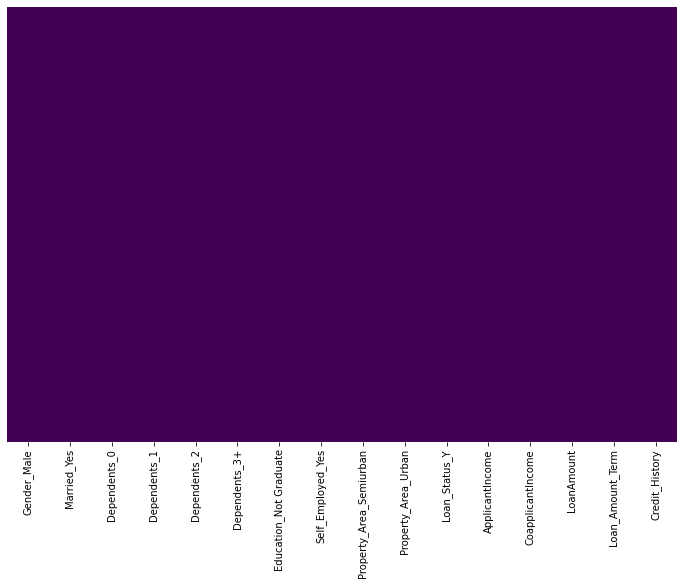

In [33]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(new_loan_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [34]:
x = new_loan_data.drop('Loan_Status_Y', axis = 1)
y = new_loan_data['Loan_Status_Y']
z = x.tail(1)
z

,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
614,1,0,0,0,0,0,0,0,0,1,5849,0.0,120.0,360.0,1.0


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [36]:
tree_model = DecisionTreeClassifier()

In [37]:
x_test

,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
44,1,1,1,0,0,0,1,1,0,1,4695,0.0,96.0,342.02995,1.0
593,1,1,1,0,0,0,0,0,0,0,3859,3300.0,142.0,180.00000,1.0
374,0,0,1,0,0,0,0,0,0,1,2764,1459.0,110.0,360.00000,1.0
115,1,1,0,1,0,0,0,0,0,0,14583,0.0,185.0,180.00000,1.0
267,1,1,0,0,0,1,0,0,0,1,4333,1811.0,160.0,360.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,1,0,0,0,0,0,0,0,0,1,5849,0.0,120.0,360.00000,1.0
394,1,1,0,0,1,0,0,0,0,1,3100,1400.0,113.0,360.00000,1.0
206,0,0,1,0,0,0,0,0,0,1,3244,0.0,80.0,360.00000,1.0
66,1,0,1,0,0,0,1,0,0,1,3200,2254.0,126.0,180.00000,0.0


In [38]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = tree_model.predict(z)
y_pred

array([1], dtype=uint8)

In [42]:
decision_accuracy = tree_model.score(x_test, y_test)
print('Decision Tree Model Accuracy:', decision_accuracy * 100, '%')

Decision Tree Model Accuracy: 70.73170731707317 %


In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
forest_model = RandomForestClassifier(n_estimators = 600)

In [253]:
forest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

In [272]:
forest_y_pred = forest_model.predict(z)
if forest_y_pred[0]==1:
    print("loan Approved")
else:
    print("loan disapproved")

loan Approved


In [255]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47        38
           1       0.76      0.87      0.81        85

    accuracy                           0.72       123
   macro avg       0.67      0.63      0.64       123
weighted avg       0.71      0.72      0.71       123



In [256]:
print(confusion_matrix(y_test, forest_y_pred))

[[15 23]
 [11 74]]


In [257]:
forest_accuracy = forest_model.score(x_test, y_test)
print('Random Forest Model Accuracy:', forest_accuracy * 100, '%')

Random Forest Model Accuracy: 72.35772357723577 %


In [258]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [259]:
features = list(new_loan_data.columns[1:])

In [260]:
dot_data = StringIO()

In [261]:
export_graphviz(tree_model, out_file = dot_data, feature_names = features, filled = True, rounded = True)

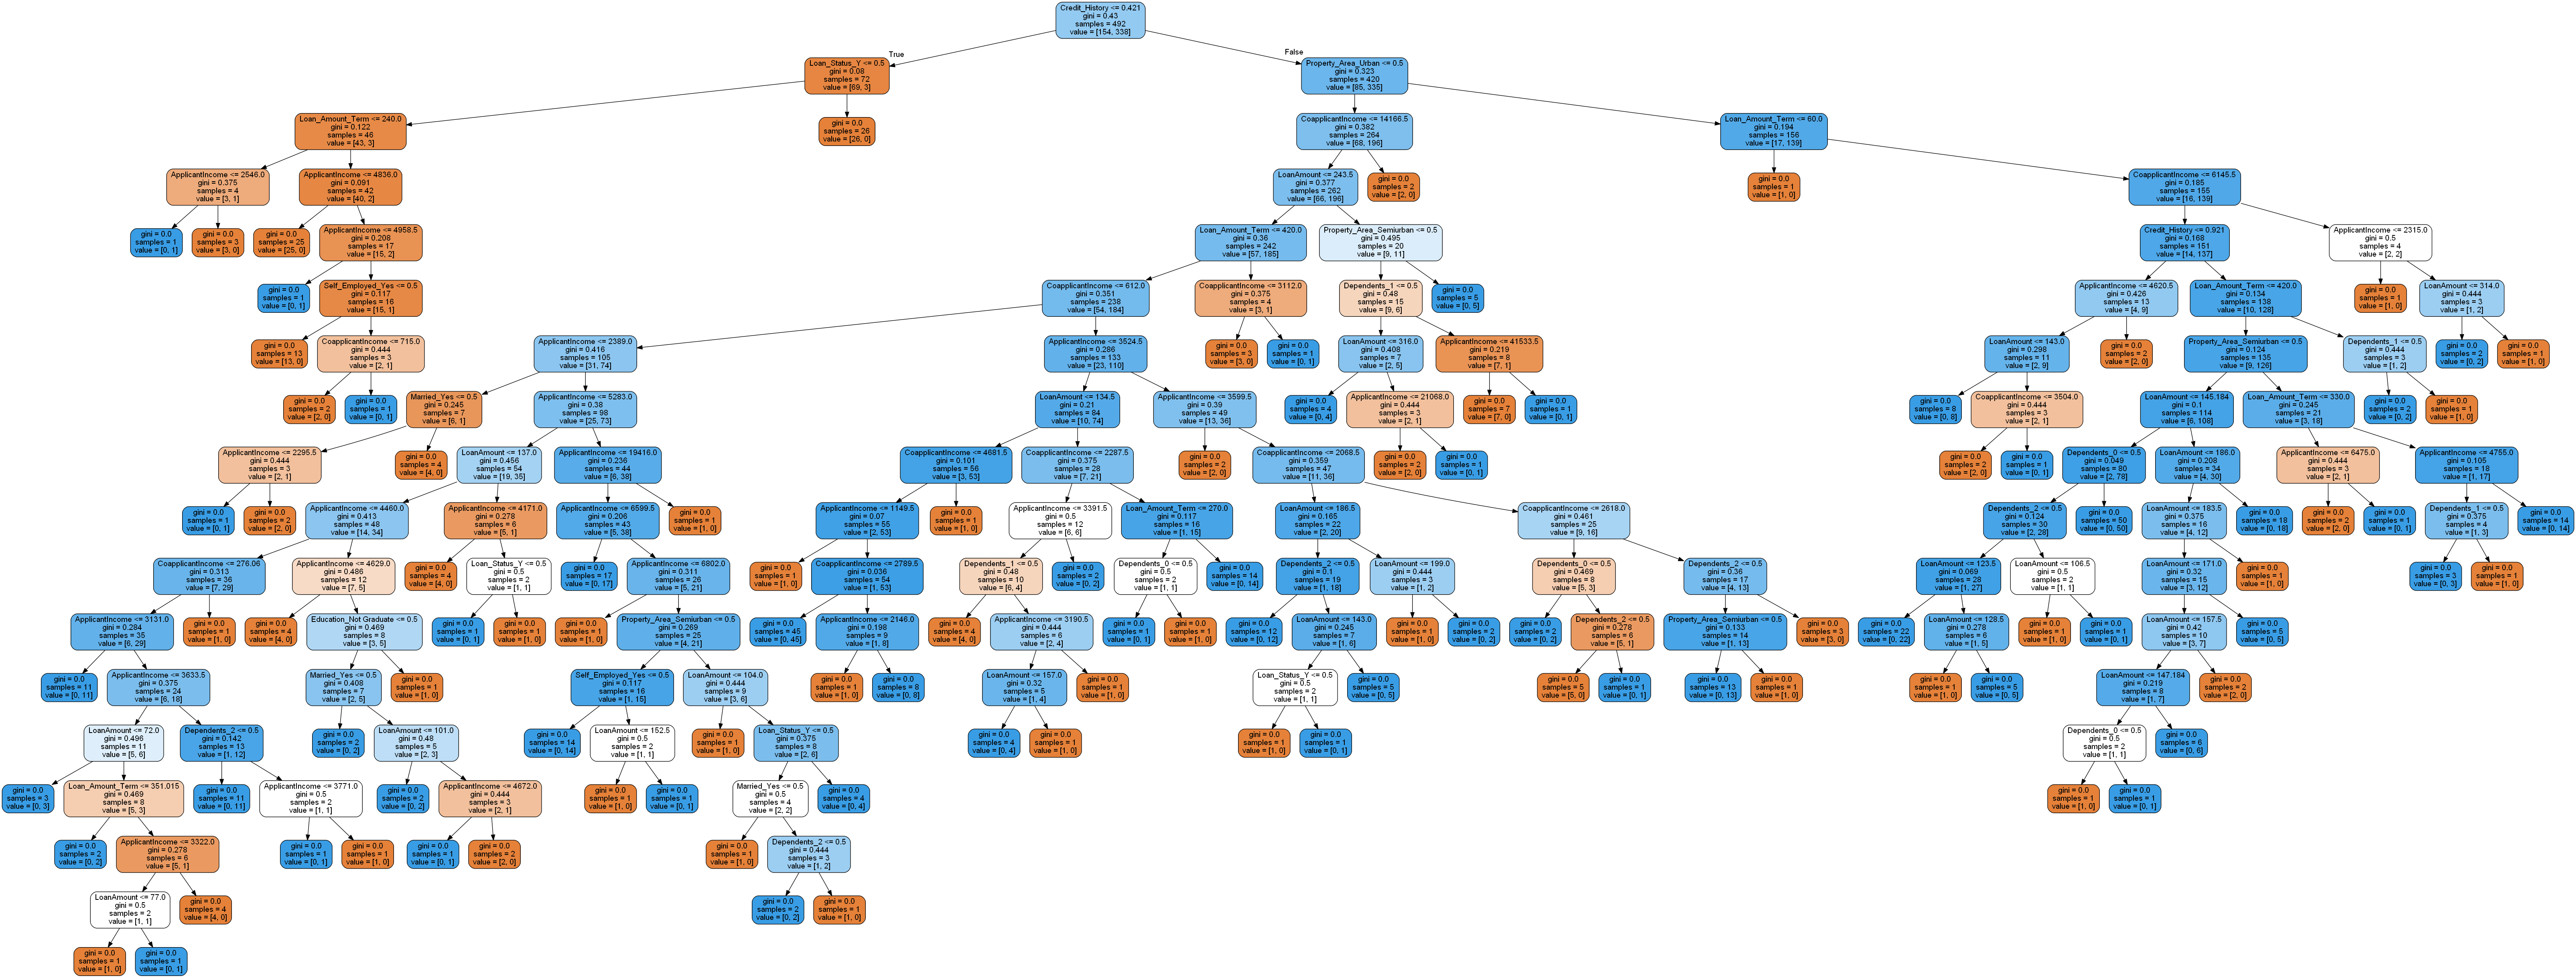

In [262]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [263]:
print('Decision Tree Model Accuracy:', decision_accuracy * 100, '%')
print('Random Forest Model Accuracy:', forest_accuracy * 100, '%')

Decision Tree Model Accuracy: 64.22764227642277 %
Random Forest Model Accuracy: 72.35772357723577 %


In [278]:
from tkinter import *
fields = tuple(precleaned_data.columns)
def makeform(root, fields):
   entries = {}
   for field in fields:
      row = Frame(root)
      lab = Label(row, width=22, text=field+": ", anchor='w')
      ent = Entry(row)
      ent.insert(0,"0")
      row.pack(side = TOP, fill = X, padx = 5 , pady = 5)
      lab.pack(side = LEFT)
      ent.pack(side = RIGHT, expand = YES, fill = X)
      entries[field] = ent
   return entries
if __name__ == '__main__':
   root = Tk()
   ents = makeform(root, fields)
   root.bind('<Return>', (lambda event, e = ents: fetch(e)))
   b1 = Button(root, text = 'Final Balance',
      command=(lambda e = ents: final_balance(e)))
   b1.pack(side = LEFT, padx = 5, pady = 5)
   b2 = Button(root, text='Monthly Payment',
   command=(lambda e = ents: monthly_payment(e)))
   b2.pack(side = LEFT, padx = 5, pady = 5)
   b3 = Button(root, text = 'Quit', command = root.quit)
   b3.pack(side = LEFT, padx = 5, pady = 5)
   root.mainloop()

In [274]:
precleaned_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
fields = tuple(precleaned_data.columns)

In [7]:
type(fields)

tuple